In [175]:
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=False)
%matplotlib inline

def calc_dist(func, points, n_bins, max_size):
    bin_width = max_size/n_bins
    xi  = np.random.random(points)
    x = func(xi)
    prob_dist = np.histogram(x, bins=np.linspace(0,max_size, n_bins))
    prob_den = prob_dist[0]/points/bin_width
    #x_ax = np.linspace(0,max_size, n_bins-1)
    #plt.plot(x_ax, prob_den, 'x')
    return prob_den

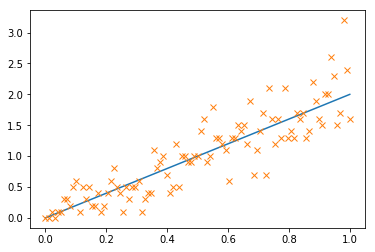

In [137]:
den = calc_dist(np.sqrt, 1000, 100, 1)
x_ax = np.linspace(0,1,99)
plt.plot(x_ax,2*x_ax)
plt.plot(x_ax, den, 'x')

Relative Error is 0.013995952160954055 with N=1,000


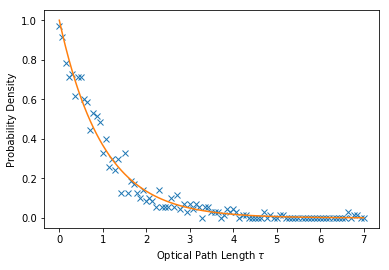

In [179]:
def exp_dist(x):
    return -np.log(1-x)

def calc_error(meas, real):
    error = np.abs(real-meas)
    ave_error = np.median(error)
    return ave_error

dat = calc_dist(exp_dist, 1000, 100, 7)
x_ax = np.linspace(0,7,99);
plt.plot(x_ax, dat, 'x')
true_ans  = np.exp(-x_ax)
plt.plot(x_ax, true_ans)
plt.xlabel(r"Optical Path Length $\tau$")
plt.ylabel("Probability Density")
e_1k = calc_error(dat,true_ans)
print("Relative Error is "+str(e_1k)+" with N=1,000")

Relative Error is 0.003957469282253375 with N=10,000


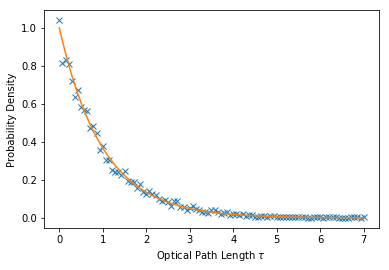

In [180]:
dat = calc_dist(exp_dist, 10000, 100, 7)
x_ax = np.linspace(0,7,99);
plt.plot(x_ax, dat, 'x')
true_ans  = np.exp(-x_ax)
plt.plot(x_ax, true_ans)
plt.xlabel(r"Optical Path Length $\tau$")
plt.ylabel("Probability Density")
e_10k = calc_error(dat,true_ans)
print("Relative Error is "+str(e_10k)+" with N=10,000")

Relative Error is 0.0010545262794613604 with N=100,000


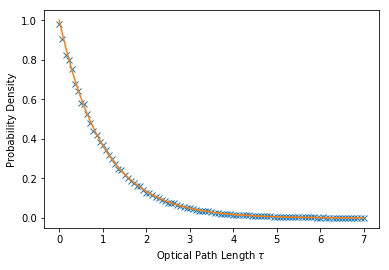

In [182]:
dat = calc_dist(exp_dist, 100000, 100, 7)
x_ax = np.linspace(0,7,99);
plt.plot(x_ax, dat, 'x')
true_ans  = np.exp(-x_ax)
plt.plot(x_ax, true_ans)
plt.xlabel(r"Optical Path Length $\tau$")
plt.ylabel("Probability Density")
e_100k = calc_error(dat,true_ans)
print("Relative Error is "+str(e_100k)+" with N=100,000")

Text(0,0.5,'Error')

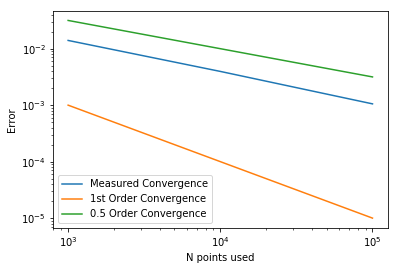

In [183]:
N = [1000,10000,100000]
plt.loglog(N, [e_1k, e_10k, e_100k], label="Measured Convergence")
plt.loglog(N, np.divide(1,N), label="1st Order Convergence")
plt.loglog(N, np.power(np.divide(1,N),0.5), label="0.5 Order Convergence")
plt.legend()
plt.xlabel("N points used")
plt.ylabel("Error")

This is converging between 1st and 0.5 order of magnitude. I.e. 10x increase in N gives 5-10x increase in accuracy.